# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction, and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Perform a linear regression using self-constructed functions
* Calculate the coefficient of determination using self-constructed functions
* Use the coefficient of determination to determine model performance

## The formulas

**Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

**R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = 1 - \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the Python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [42]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [3]:
# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype=np.float64)
Y = np.array([7, 7, 8, 9, 9, 10, 10, 11, 11, 12], dtype=np.float64)


In [15]:
def calc_slope(xs,ys):
    return ((xs.mean() * ys.mean()) - (X*Y).mean()) / ((xs.mean())**2 - (xs**2).mean())

def best_fit(xs,ys):
    slope = calc_slope(xs, ys)
    y_int = ys.mean() - slope * xs.mean()
    return slope, y_int

def reg_line(m, c, xs):
    y_line = []
    for x in xs:
        y_line.append((m * x) + c)
    return y_line

def sq_err(y_real, y_predicted):
    x = 0
    differences = []
    while x < len(y_real):
        differences.append(y_real[x] - y_predicted[x])
        x += 1
    summation = 0
    for diff in differences:
        summation += diff**2
    return summation

def r_squared(y_real, y_predicted):
    x = 0
    differences = []
    while x < len(Y):
        differences.append(y_real[x] - y_real.mean())
        x += 1
    summation = 0
    for diff in differences:
        summation += diff**2
    return (1 - (sq_err(y_real, y_predicted) / summation))


In [70]:
def regression_diagnostics(xs, ys):
    slope, y_int = best_fit(xs, ys)
    y_line = reg_line(slope, y_int, xs)
    r_sq = r_squared(ys, y_line)
    print('Regression Diagnostics')
    print('----------------------')
    print('Slope: ' + str(round(slope, 2)))
    print('Y-intercept: ' + str(round(y_int, 2)))
    print('R-Squared: ' + str(round(r_sq, 2)))
    print('----------------------')
    print('Model: Y = ' + str(round(slope, 2)) + ' * X + ' + str(round(y_int, 2)))
    fig = plt.figure(figsize=(8, 5))
    ax = fig.gca()
    ax.scatter(xs, ys, label='Data', color = 'b')
    ax.plot(xs, y_line, label='Regression Line')
    ax.legend()
    ax.plot()

Regression Diagnostics
----------------------
Slope: 0.56
Y-intercept: 6.33
R-Squared: 0.97
----------------------
Model: Y = 0.56 * X + 6.33


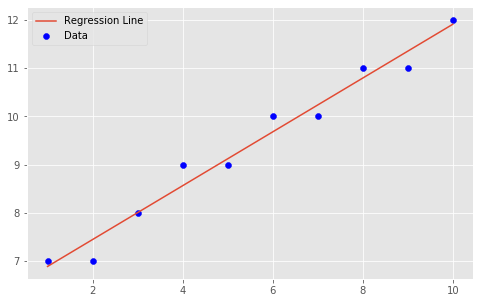

In [71]:
regression_diagnostics(X, Y)

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


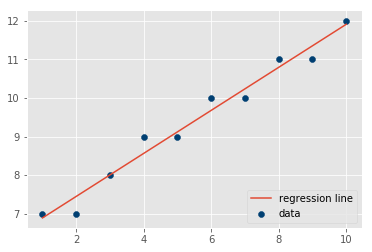

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

In [74]:
x_new = 4.5

m, c = best_fit(X, Y)

y_predicted = m * x_new + c
y_predicted

8.842424242424244

[]

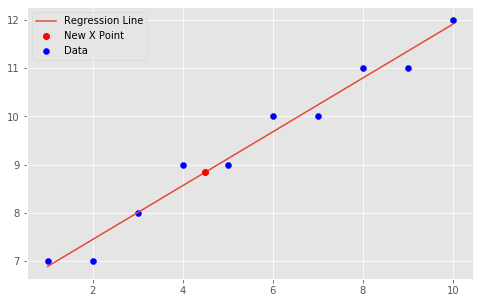

In [82]:
slope, y_int = best_fit(X, Y)
y_line = reg_line(slope, y_int, X)
r_sq = r_squared(Y, y_line)

fig = plt.figure(figsize=(8, 5))
ax = fig.gca()
ax.scatter(X, Y, label='Data', color = 'b')
ax.plot(X, y_line, label='Regression Line')
ax.plot(x_new, y_predicted,'ro', label='New X Point') 
ax.legend()
ax.plot()

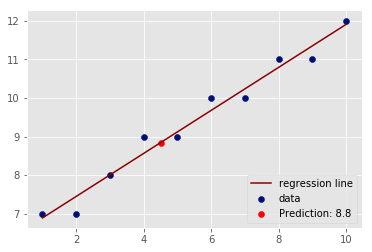

In [66]:
# Make prediction for x = 4.5 and visualize on the scatter plot

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use Python's built-in modules to perform similar analyses with a much higher level of sophistication. 